<a href="https://colab.research.google.com/github/camposouza/NMR/blob/master/Fitting_NMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução...

#Rode a célula abaixo para fazer o upload de seus dados.

In [16]:
from google.colab import files

uploaded = files.upload()

##Abaixo, digite o nome_do_seu_arquivo.txt.
##Especifique também o *delimiter* (delimitador) de seu arquivo

Os delimitadores mais comuns são a vírgula, ponto vírgula e tabulações.

In [24]:
data = pd.read_csv('data.txt', delimiter='\t', index_col=0, header=None)
# vírgula: ','
# ponto e vírgula: ';'
# tabulações: '\t'

#Qual o melhor ajuste para o seu conjunto de dados? Escolha abaixo e rode a célula. 
Um gráfico será gerado para a primeira amostra e sua tabela estará nos arquivos deste notebook *(sample_data)*

# Decaimento Mono Exponencial:
##$y = A\mathrm{e}^{-t/K} + C$

Clique no play abaixo. O código também está disponível para uso.

10


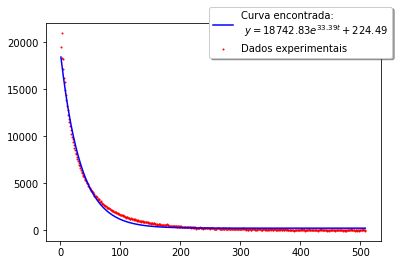

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import pandas as pd


def main():
    t = np.array(data.index)

    results = pd.DataFrame(index=['A', 'K', 'C'])
    for i in range(0, data.shape[1]):
        y = np.array(data.iloc[:, i])

        # Non-linear Fit
        A, K, C = fit_exp_nonlinear(t, y)
        fit_y = model_func(t, A, K, C)

        # Graphing Result
        if i == 0:
            fig = plt.figure()
            ax1 = fig.add_subplot()

            ax1.scatter(t, y, c='red', s=1,
                        label='Dados experimentais')
            ax1.plot(t, fit_y, 'b-',
                     label='Curva encontrada:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
            ax1.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

        # Filling the Sheet
        results.insert(i, i, [A, K, C])

    results.to_csv('MonoFitting', sep='\t')
    plt.show()


def model_func(t, A, K, C):
    return A * np.exp((-1/K) * t) + C


def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C


if __name__ == '__main__':
    main()


# Decaimento Bi Exponencial:
##$y = A_1\mathrm{e}^{-t/K_1} + A_2\mathrm{e}^{-t/K_2} + C $

Clique no play abaixo. O código também está disponível para uso.

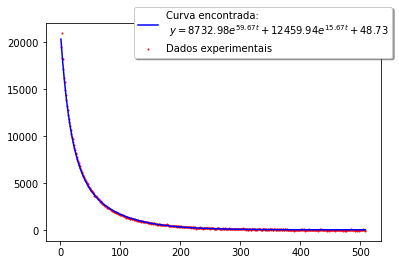

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import pandas as pd


def main():
    t = np.array(data.index)

    results = pd.DataFrame(index=['A1', 'K1', 'A2', 'K2', 'C'])
    for i in range(0, data.shape[1]):
        y = np.array(data.iloc[:, 0])

        # Non-linear Fit
        A1, K1, A2, K2, C = fit_exp_nonlinear(t, y)
        fit_y = model_func(t, A1, K1, A2, K2, C)

        # Graphing Result
        if i == 0:
            fig = plt.figure()
            ax1 = fig.add_subplot()

            ax1.scatter(t, y, c='red', s=1,
                        label='Dados experimentais')
            ax1.plot(t, fit_y, 'b-',
                     label='Curva encontrada:\n $y = %0.2f e^{%0.2f t} + %0.2f e^{%0.2f t} + %0.2f$'
                           % (A1, K1, A2, K2, C))
            ax1.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

        # Filling the Sheet
        results.insert(i, i, [A1, K1, A2, K2, C])

    results.to_csv('BiFitting', sep='\t')
    plt.show()


def model_func(t, A1, K1, A2, K2, C):
    return A1 * np.exp((-1/K1) * t) + A2 * np.exp((-1/K2) * t) + C


def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A1, K1, A2, K2, C = opt_parms
    return A1, K1, A2, K2, C


if __name__ == '__main__':
    main()
